In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Utilities.SequentialLearning.EWC_Methods.EWC_Methods import EWC_Method
from Utilities.Interpretability.ModelAugmentation import AggregationLevel, AggregationMethod

In [2]:
data_file = "data/AggregatedData.csv"
df = pd.read_csv(data_file, index_col="Unnamed: 0")
display(df)

,Epoch,Ewc Method,Aggregation Level,Threshold Value,Loss Mean,Loss Err,Validation Loss Mean,Validation Loss Err
0,5,FISHER_MATRIX,CONV_FILTER,0.00,0.020821,0.000202,0.032779,0.000268
1,5,FISHER_MATRIX,CONV_FILTER,0.05,0.021673,0.000181,0.032949,0.000233
2,5,FISHER_MATRIX,CONV_FILTER,0.10,0.027803,0.000246,0.037857,0.000272
3,5,FISHER_MATRIX,CONV_FILTER,0.15,0.102597,0.005997,0.109711,0.005743
4,5,FISHER_MATRIX,CONV_FILTER,0.20,0.187717,0.012507,0.191533,0.012078
...,...,...,...,...,...,...,...,...
1570,25,WEIGHT_CHANGE,UNIT,0.80,2.454735,0.011780,2.452886,0.011639
1571,25,WEIGHT_CHANGE,UNIT,0.85,2.354997,0.002851,2.354336,0.002801
1572,25,WEIGHT_CHANGE,UNIT,0.90,2.317778,0.001167,2.317633,0.001148
1573,25,WEIGHT_CHANGE,UNIT,0.95,2.305949,0.000170,2.305914,0.000168


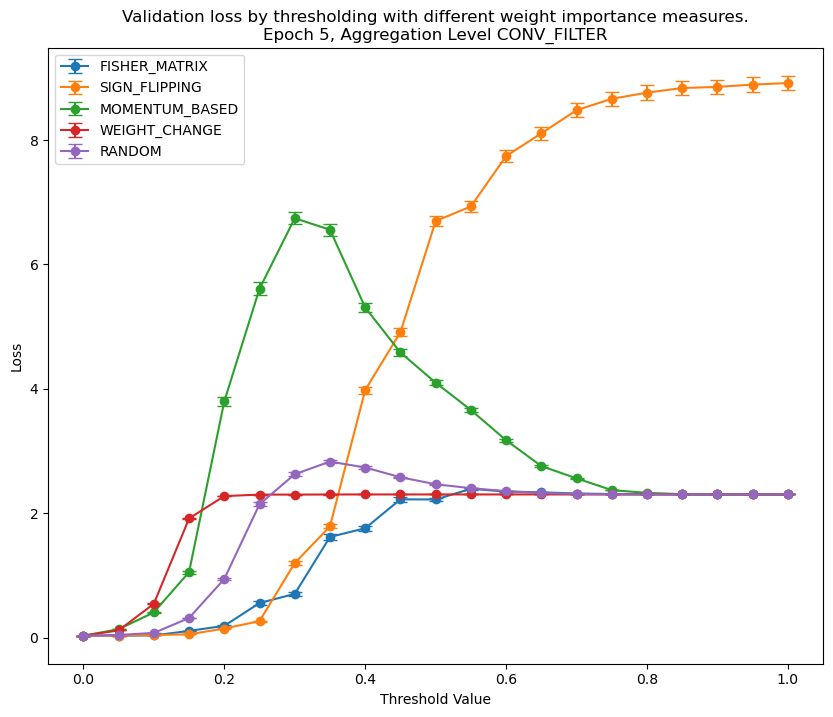

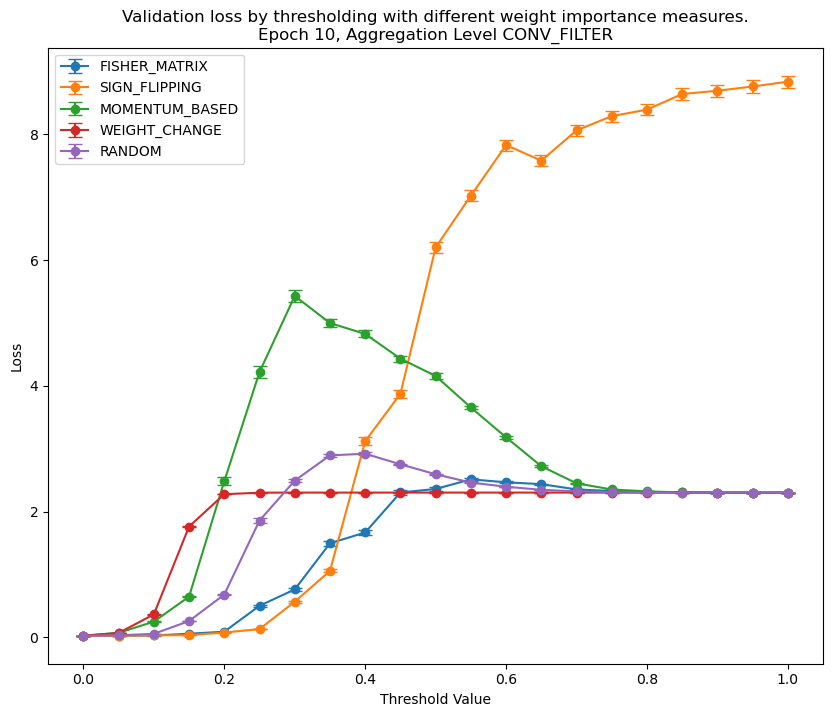

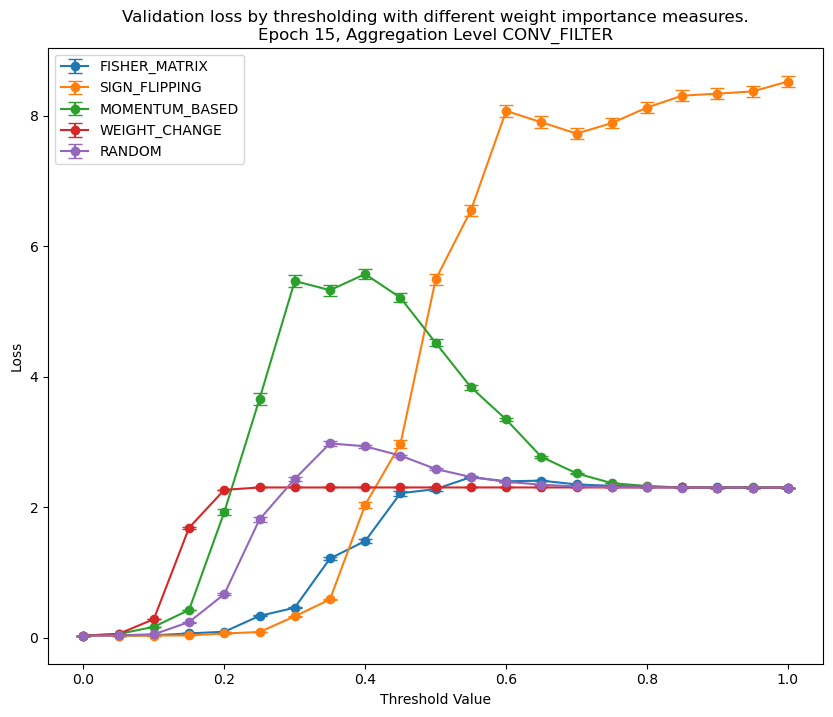

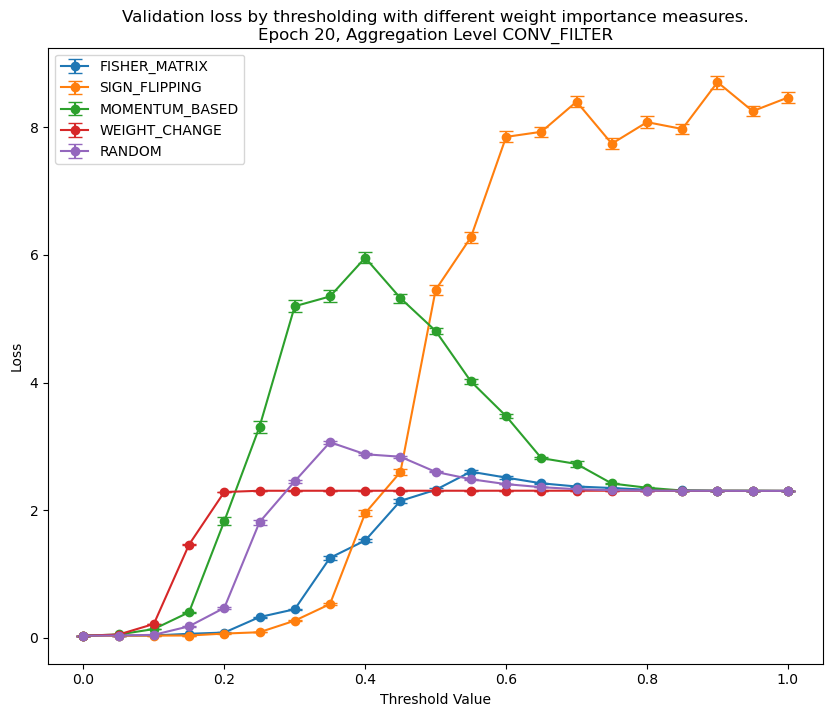

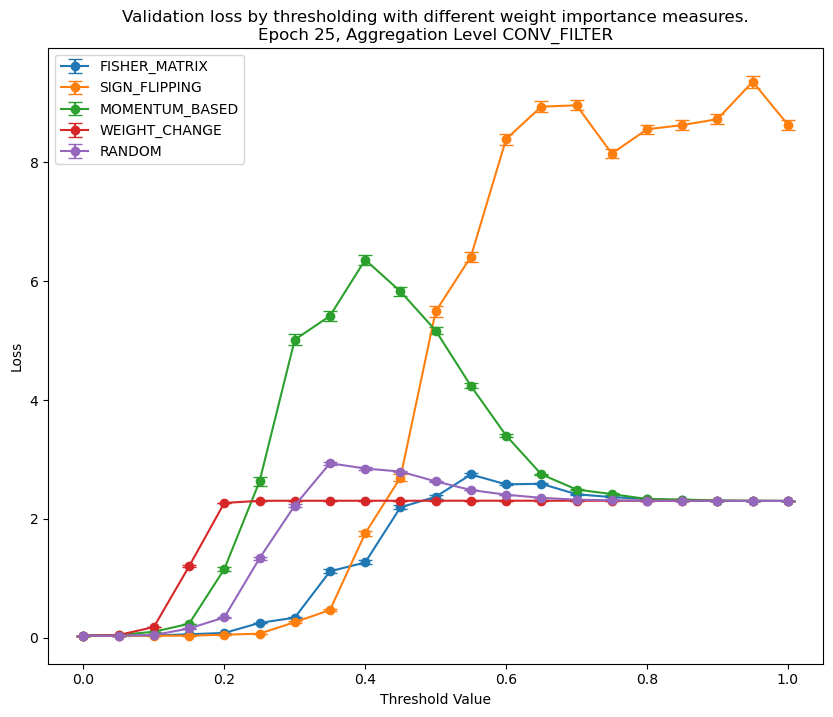

In [6]:
# Each plot is a snapshot of the model at a specific epoch - and all lines contain EWC methods with the same aggregation level

VALIDATION = True

target_methods = [
    EWC_Method.FISHER_MATRIX,
    EWC_Method.SIGN_FLIPPING,
    EWC_Method.MOMENTUM_BASED,
    EWC_Method.WEIGHT_CHANGE,
    EWC_Method.RANDOM,
]
target_methods = [method.name for method in target_methods]
target_aggregation_level = AggregationLevel.CONV_FILTER.name

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["Aggregation Level"]==target_aggregation_level]
    for ewc_method in target_methods:
        curr_data = epoch_data[epoch_data["Ewc Method"]==ewc_method]
        y_col = "Validation Loss Mean" if VALIDATION else "Loss Mean"
        y_err_col = "Validation Loss Err" if VALIDATION else "Loss Err"
        plt.errorbar(curr_data["Threshold Value"], curr_data[y_col], curr_data[y_err_col], marker="o", capsize=5, label=f"{ewc_method}")
    plt.title(f"Validation loss by thresholding with different weight importance measures.\nEpoch {epoch}, Aggregation Level {target_aggregation_level}")
    # plt.ylim(0, 2*np.log(10))
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

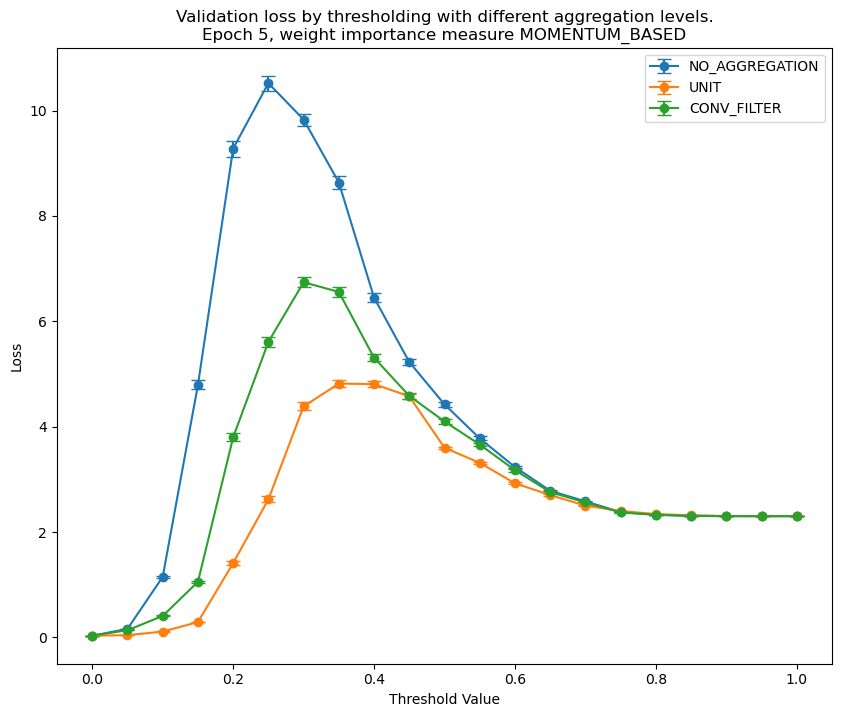

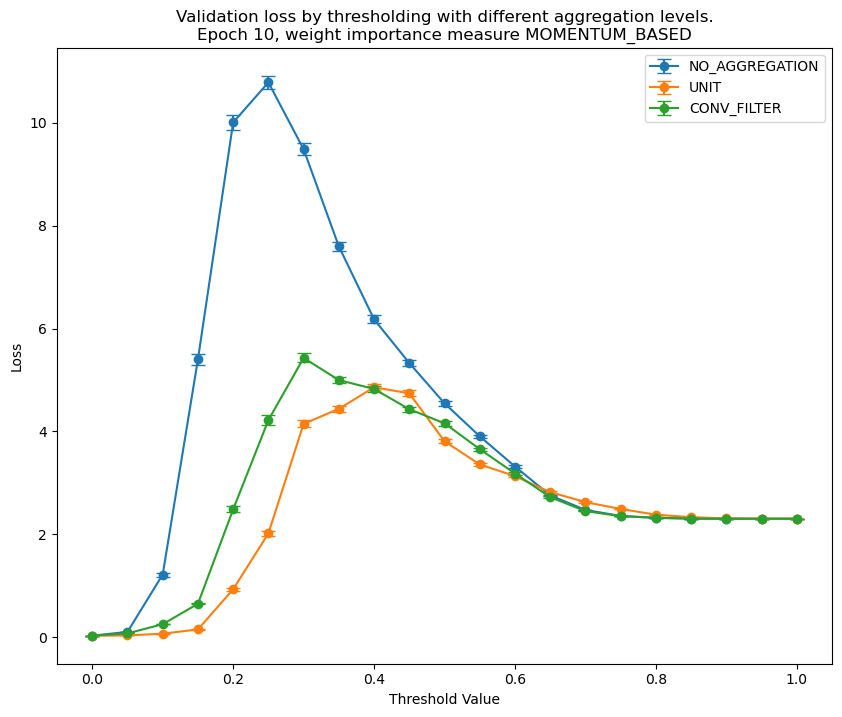

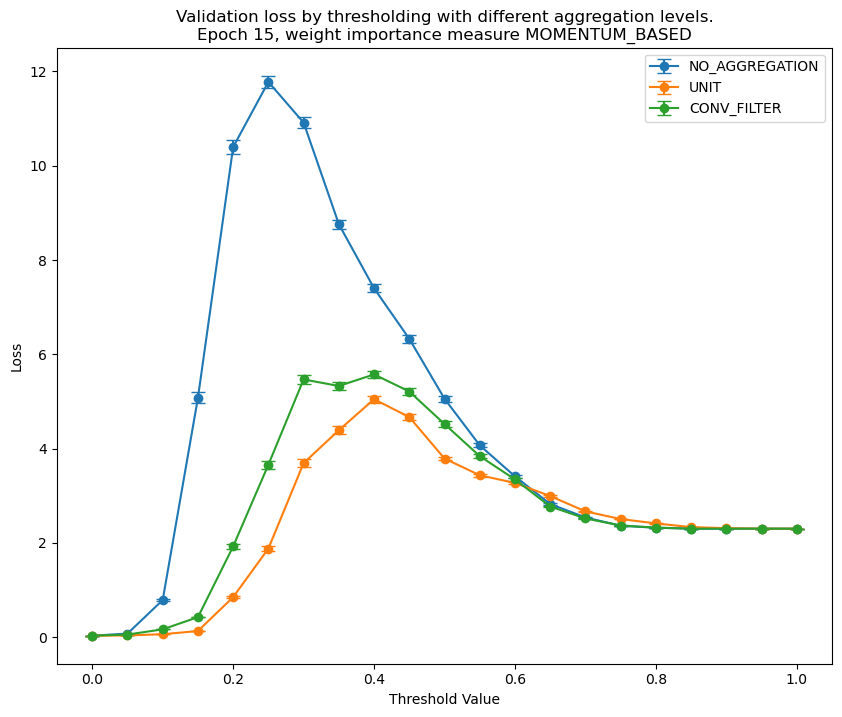

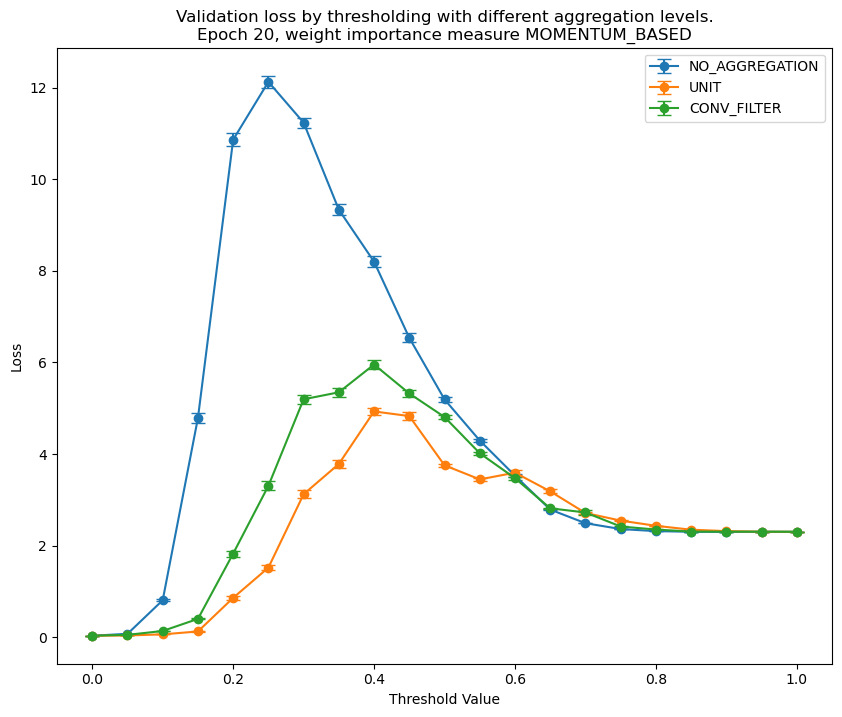

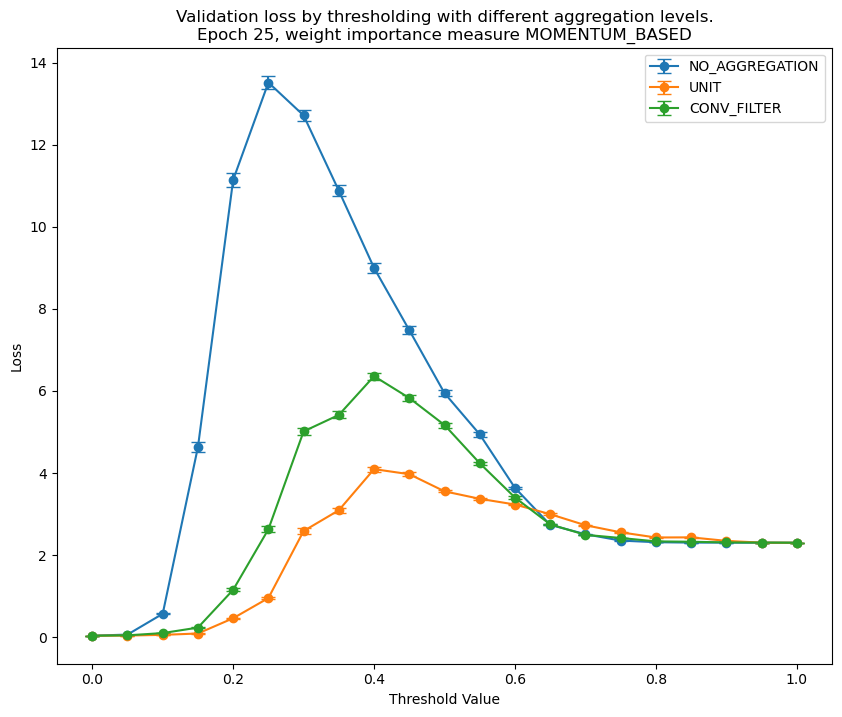

In [8]:
# Each plot is a snapshot of different aggregation levels - all lines are different aggregation levels with the same EWC method

VALIDATION = True

target_ewc_method = EWC_Method.MOMENTUM_BASED.name
target_aggregation_levels = [
    AggregationLevel.NO_AGGREGATION,
    AggregationLevel.UNIT,
    AggregationLevel.CONV_FILTER
]
target_aggregation_levels = [level.name for level in target_aggregation_levels]

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["Ewc Method"]==target_ewc_method]
    for aggregation_level in target_aggregation_levels:
        curr_data = epoch_data[epoch_data["Aggregation Level"]==aggregation_level]
        y_col = "Validation Loss Mean" if VALIDATION else "Loss Mean"
        y_err_col = "Validation Loss Err" if VALIDATION else "Loss Err"
        plt.errorbar(curr_data["Threshold Value"], curr_data[y_col], curr_data[y_err_col], marker="o", capsize=5, label=f"{aggregation_level}")
    plt.title(f"Validation loss by thresholding with different aggregation levels.\nEpoch {epoch}, weight importance measure {target_ewc_method}")
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()